In [2]:
# Import the libraries

import math
import pandas_datareader as pd_r
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

2024-02-10 14:36:55.456931: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-10 14:36:55.549819: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-10 14:36:55.549875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-10 14:36:55.551965: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-10 14:36:55.564706: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-10 14:36:55.566154: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
# Set the start and end dates
start_date = '2012-01-01'
end_date = '2024-02-09'

# Fetch the data
df = yf.download('GBPUSD=X', start=start_date, end=end_date)

# Show the data
df

/home/ago/Learning/Data-Science-Projects/datascience/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,1.552602,1.554896,1.547604,1.551205,1.551205,0
2012-01-03,1.552096,1.562500,1.551109,1.552000,1.552000,0
2012-01-04,1.564700,1.567005,1.558263,1.564407,1.564407,0
2012-01-05,1.561207,1.562695,1.546910,1.560939,1.560939,0
2012-01-06,1.550195,1.552675,1.538201,1.550171,1.550171,0
...,...,...,...,...,...,...
2024-02-02,1.274730,1.277286,1.262371,1.274730,1.274730,0
2024-02-05,1.261686,1.262993,1.252003,1.262196,1.262196,0
2024-02-06,1.253447,1.259462,1.253447,1.253447,1.253447,0


In [4]:
#Get shape of data

df.shape

(3155, 6)

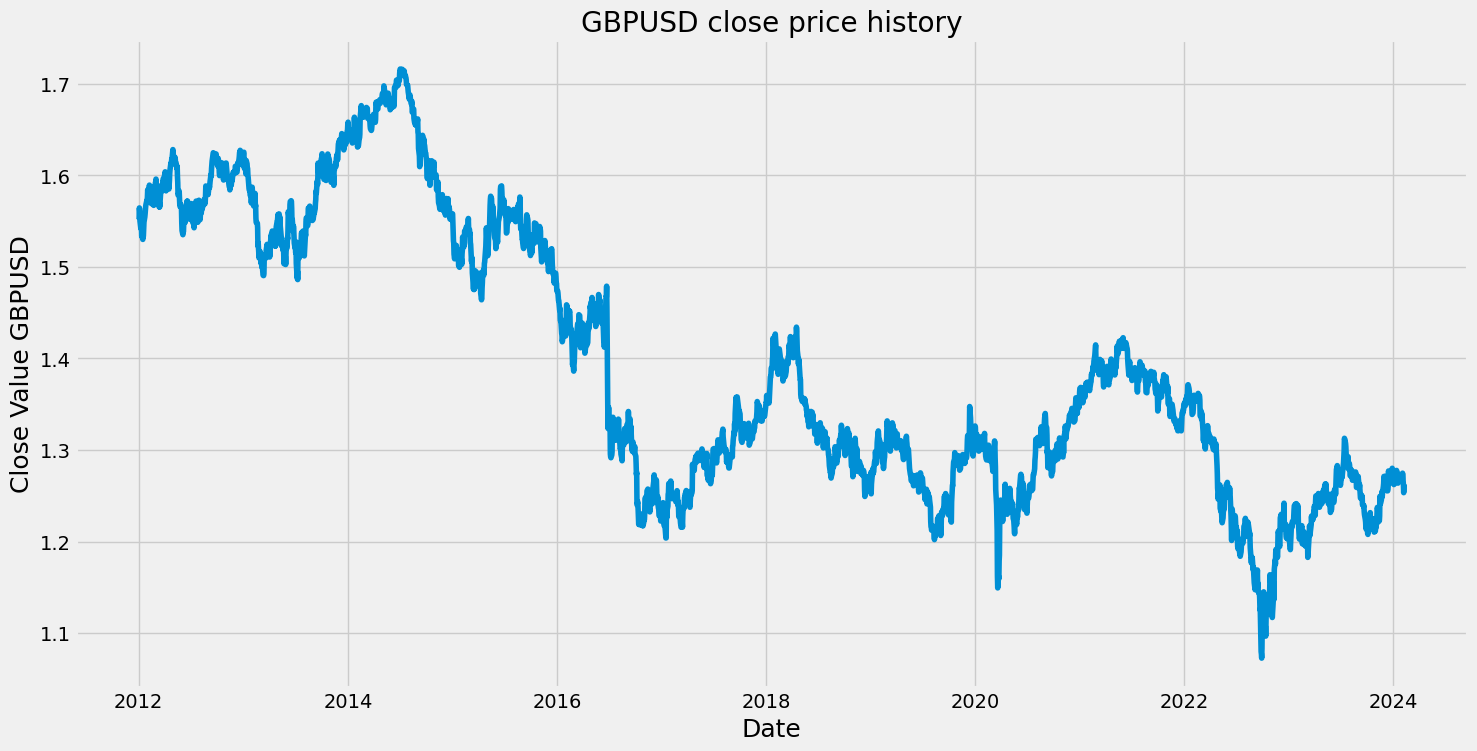

In [5]:
# Visualize the closing price

plt.figure(figsize=(16,8))
plt.title('GBPUSD close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Value GBPUSD',fontsize = 18)
plt.show()

In [6]:
# 'Close' data frame
data = df.filter(['Close'])
# Dataframe to numpy array
dataset = data.values

# Get number of rows to train

training_data_len = math.ceil(len(dataset)*0.8)

training_data_len


2524

In [7]:
# Data Scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.74370341],
       [0.74493824],
       [0.76422357],
       ...,
       [0.28086849],
       [0.29206887],
       [0.29531029]])

In [8]:
# create training dataset (Scaled)

train_data = scaled_data[0:training_data_len,:]
# Split the train_data into x_train and y_train
x_train = []
y_train = []

for i in range (60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.74370341, 0.74493824, 0.76422357, 0.75883342, 0.74209632,
       0.72931497, 0.73546559, 0.73788263, 0.7163398 , 0.71729057,
       0.71075916, 0.71462264, 0.7167419 , 0.73094226, 0.74000615,
       0.74891364, 0.75410867, 0.76156361, 0.76685129, 0.77013441,
       0.77665026, 0.77423155, 0.7823128 , 0.79512064, 0.78889424,
       0.78893296, 0.79044797, 0.80294858, 0.79044797, 0.79044797,
       0.78567671, 0.77691931, 0.77154954, 0.77116708, 0.78967082,
       0.79922408, 0.79285981, 0.7869549 , 0.76856808, 0.77999842,
       0.80196724, 0.79356098, 0.80743263, 0.80766907, 0.81319912,
       0.79360008, 0.8002032 , 0.77653519, 0.77845784, 0.79239267,
       0.76872077, 0.76582233, 0.77384817, 0.76582233, 0.77346479,
       0.7942238 , 0.80216347, 0.79824589, 0.8002032 , 0.79278217])]
[0.8005949198889024]

[array([0.74370341, 0.74493824, 0.76422357, 0.75883342, 0.74209632,
       0.72931497, 0.73546559, 0.73788263, 0.7163398 , 0.71729057,
       0.71075916, 0.71462264, 0.716

In [9]:
# Convert x_train and y_train to numpy array

x_train,y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data for LSTM
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2464, 60, 1)

In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
# Complie the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error' )

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 5)

Epoch 1/5
2464/2464 [==============================] - 69s 27ms/step - loss: 0.0016
Epoch 2/5
2464/2464 [==============================] - 66s 27ms/step - loss: 5.5385e-04
Epoch 3/5
2464/2464 [==============================] - 65s 26ms/step - loss: 3.8524e-04
Epoch 4/5
2464/2464 [==============================] - 64s 26ms/step - loss: 3.4222e-04
Epoch 5/5
2464/2464 [==============================] - 65s 26ms/step - loss: 3.0903e-04


In [15]:
# create testing dataset
test_data = scaled_data[training_data_len-60: , :]
#create dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [16]:
# Convert to numpy array
x_test = np.array(x_test)
# Reshape data for LSTM
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
 

In [17]:
# Get model model's predicted values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


20/20 [==============================] - 1s 15ms/step


In [18]:
# Model Evaluation by RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse 

0.0007281507440678858

/tmp/ipykernel_1066522/1804160119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


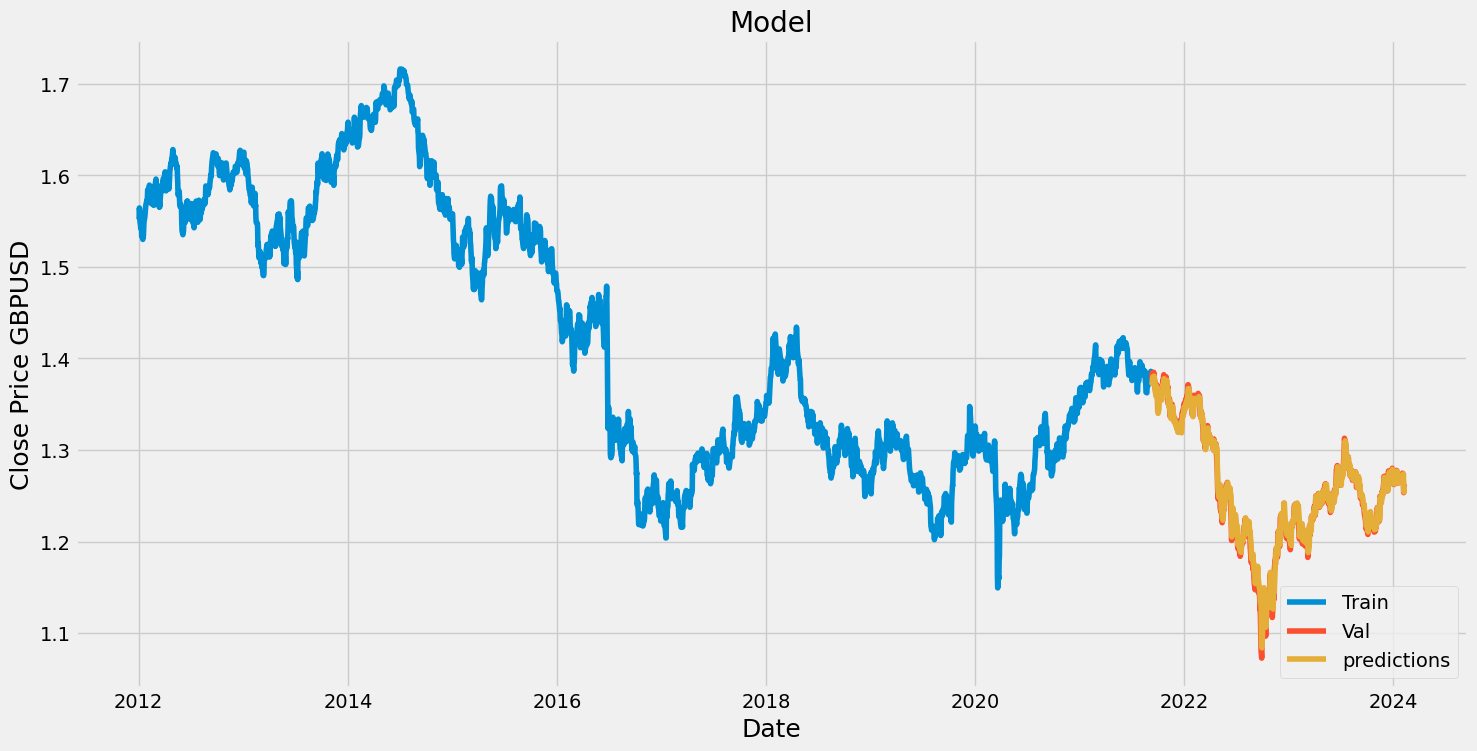

In [19]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

#Visualization

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price GBPUSD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train','Val','predictions'], loc = 'lower right')
plt.show()

In [20]:
# show valid and predicted
valid

,Close,predictions
Date,,
2021-09-09,1.376766,1.373734
2021-09-10,1.383968,1.372678
2021-09-13,1.384083,1.379936
2021-09-14,1.383815,1.380030
2021-09-15,1.381025,1.379621
...,...,...
2024-02-02,1.274730,1.267742
2024-02-05,1.262196,1.273975
2024-02-06,1.253447,1.262960
